# **Makine Öğrenmesi Final**

Mert Can Sarıbıyık - 21040101025

Bizim için önemli olmayan uyarıların gösterilmemesi için aşağıdaki kodu uygularız :


In [10]:
import warnings

warnings.filterwarnings('ignore')

## **Veri Setini Oluşturma ve Ayırma**

Tüm sorular için kullanılacak veri setini oluşturup, bu veri setini %70 eğitim ve %30 test olarak ayıran bir fonksiyon tanımlamaya karar verdim. Bu sayede, tüm sorular için veri setini ayarlamak fonksiyonu çağırarak kolayca gerçekleştirilebilir.

Öncelikle data`mızı tanımlayalım : 

In [11]:
import pandas as pd

In [12]:
data = pd.read_csv("./pima-indians-diabetes.csv")
print(f'Row - column : {data.shape}')
data.head()

Row - column : (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Daha sonra, normalizasyon ve train test ayırımı için fonksiyonlar yazalım : 

In [13]:
from sklearn.preprocessing import MinMaxScaler

def normalize(df):
    label = df["Outcome"]
    normalized_df = df.drop("Outcome", axis=1)

    min_max_scaler = MinMaxScaler()
    normalized_df = pd.DataFrame(min_max_scaler.fit_transform(normalized_df), columns=normalized_df.columns)

    normalized_df = pd.concat([label, normalized_df], axis=1)
    return normalized_df

In [14]:
from sklearn.model_selection import train_test_split

def trainTest(df):
    X = df.drop("Outcome", axis=1)
    y = df["Outcome"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    return X_train, X_test, y_train, y_test

Normalizasyon işlemini uygulayalım
 : 

In [15]:
data = normalize(data)
data.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age
0,1,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,1,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


## **Sorular**


**Soru - 1 :** Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Eğitim veri seti için Naive bayes sınıflandırıcısını uygulayınız. Elde ettiğiniz sonucları raporlayınız ? 

Veriye normalizasyon zaten yapmıştık. Naive bayes yapmamız yeterli : 

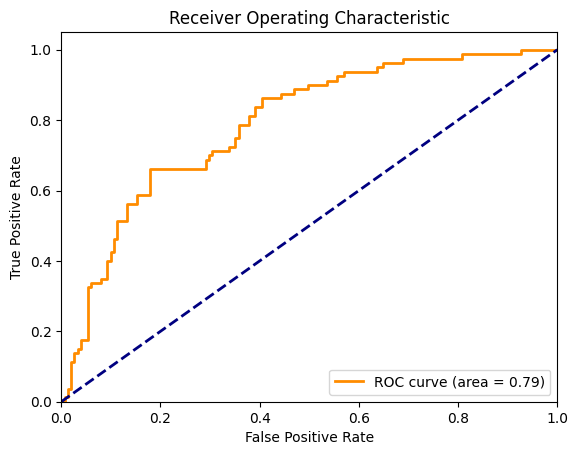

{'Confusion Matrix': array([[119,  32],
        [ 27,  53]], dtype=int64),
 'Accuracy': 0.7445887445887446,
 'Sensitivity': 0.6625,
 'Specificity': 0.7880794701986755,
 'F1 Score': 0.6424242424242423,
 'ROC AUC': 0.7904801324503311}

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Veri setini train test olarak ayırma
X_train, X_test, y_train, y_test = trainTest(data)

# Naive Bayes modelini oluşturma ve eğitme
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test seti ile tahmin yapma
y_pred = nb_model.predict(X_test)
y_pred_proba = nb_model.predict_proba(X_test)[:, 1]

# Sonuçları raporlama

# Konfüzyon matrisi
conf_matrix = confusion_matrix(y_test, y_pred)

# Diğer metrikler
class_report = classification_report(y_test, y_pred, output_dict=True)
accuracy = class_report['accuracy']
sensitivity = class_report['1']['recall']
specificity = class_report['0']['recall']
f1_score = class_report['1']['f1-score']

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Sonuçları yazdırma
nb_results = {
    "Confusion Matrix": conf_matrix,
    "Accuracy": accuracy,
    "Sensitivity": sensitivity,
    "Specificity": specificity,
    "F1 Score": f1_score,
    "ROC AUC": roc_auc
}

nb_results

Elde ettiğimiz çıktının yorumlanması : 

### **ROC Eğrisi ve AUC Değeri**

**ROC Eğrisi**, modelin farklı eşik değerlerinde nasıl performans gösterdiğini görsel olarak sunar. Eğrinin sol üst köşeye ne kadar yakın olduğu, modelin performansının o kadar iyi olduğunu gösterir. **AUC** ise, ROC eğrisinin altındaki alanı temsil eder ve modelin genel performansını tek bir sayıyla özetler. 1.0 en iyi değeri temsil eder, 0.5 ise rasgele tahmin anlamına gelir. Modelimiz de AUC değeri 0.79 çıkmıştır. Bu modelin iyi bir performans sergilediğini, ancak mükemmel olmadığını gösterir.

### **Confusion Matrisi**

* **True Positives (TP) = 53:** Modelin pozitif olarak doğru sınıflandırdığı örnek sayısı.
* **True Negatives (TN) = 119:** Modelin negatif olarak doğru sınıflandırdığı örnek sayısı.
* **False Positives (FP) = 32:** Modelin pozitif olarak yanlış sınıflandırdığı örnek sayısı.
* **False Negatives (FN) = 27:** Modelin negatif olarak yanlış sınıflandırdığı örnek sayısı.

### **Diğer Metrikler**

* **Accuracy (Doğruluk) = 0.745:** Modelin tüm tahminlerinin ne kadar doğru olduğunu gösterir. Bu model, %74.5 doğruluk oranına sahip.
* **Sensitivity (Duyarlılık) = 0.662:** Modelin pozitif sınıfı doğru tespit etme oranı. Bu modelin duyarlılığı %66.2.
* **Specificity (Özgüllük) = 0.788:** Modelin negatif sınıfı doğru tespit etme oranı. Bu modelin özgüllüğü %78.8.
* **F1 Score = 0.642:** Modelin pozitif sınıf performansının dengeli bir ölçüsü. Bu model için F1 skoru %64.2.


Genel olarak, Naive Bayes sınıflandırıcısı bu veri setinde iyi bir performans sergilemiş ancak daha yüksek bir doğruluk ve F1 skoru elde etmek için diğer modeller veya daha ileri optimizasyon teknikleri kullanılabilir.

**Soru - 2 :** Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Eğitim veri seti için K-en yakın komşuluk sınıflandırıcısını uygulayınız. En iyi k değerini belirleyerek Elde ettiğiniz sonuçları raporlayınız ?

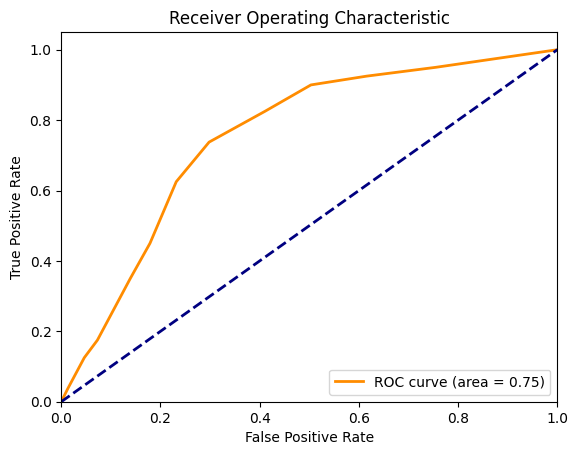

{'Best K': 13,
 'Confusion Matrix': array([[124,  27],
        [ 44,  36]], dtype=int64),
 'Accuracy': 0.6926406926406926,
 'Sensitivity': 0.45,
 'Specificity': 0.8211920529801324,
 'F1 Score': 0.5034965034965034,
 'ROC AUC': 0.7537251655629138}

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Veri setini train test olarak ayırma
X_train, X_test, y_train, y_test = trainTest(data)

# KNN için parametre grid'i
param_grid = {'n_neighbors': list(range(1, 31))}

# Grid Search ile en iyi parametreleri bulma
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi KNN modeli
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

# Sonuçları raporlama

# Konfüzyon matrisi
conf_matrix = confusion_matrix(y_test, y_pred)

# Diğer metrikler
class_report = classification_report(y_test, y_pred, output_dict=True)
accuracy = class_report['accuracy']
sensitivity = class_report['1']['recall']
specificity = class_report['0']['recall']
f1_score = class_report['1']['f1-score']

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Sonuçları yazdırma
knn_results = {
    "Best K": best_knn.n_neighbors,
    "Confusion Matrix": conf_matrix,
    "Accuracy": accuracy,
    "Sensitivity": sensitivity,
    "Specificity": specificity,
    "F1 Score": f1_score,
    "ROC AUC": roc_auc
}

knn_results

Elde ettiğimiz çıktının yorumlanması : 

### **En iyi K değeri**

**Best K = 13:** Grid Search işlemi sonucunda en iyi performansı veren k değeri 13 olarak belirlenmiş.

### **ROC Eğrisi ve AUC Değeri**

**ROC curve (area = 0.75):** ROC eğrisinin altında kalan alan (AUC) değeri 0.75 olarak hesaplanmış. Bu, modelin genel performansının iyi olduğunu fakat mükemmel olmadığını gösterir.

### **Confusion Matrisi**

* **True Positives (TP) = 36:** Modelin pozitif olarak doğru sınıflandırdığı örnek sayısı.
* **True Negatives (TN) = 124:** Modelin negatif olarak doğru sınıflandırdığı örnek sayısı.
* **False Positives (FP) = 27:** Modelin pozitif olarak yanlış sınıflandırdığı örnek sayısı.
* **False Negatives (FN) = 44:** Modelin negatif olarak yanlış sınıflandırdığı örnek sayısı.

### **Diğer Metrikler**

* **Accuracy = 0.693:** Modelin genel doğruluk oranı %69.3. Bu, modelin toplam tahminlerinin %69.3'ünün doğru olduğunu gösterir.
* **Sensitivity (Recall) = 0.45:** Modelin pozitif sınıfları doğru tahmin etme oranı %45. Bu oran, modelin pozitif vakaları tespit etmede zorlandığını gösterir.
* **Specificity = 0.821:** Modelin negatif sınıfları doğru tahmin etme oranı %82.1. Bu oran, modelin negatif vakaları tespit etmede daha başarılı olduğunu gösterir.
* **F1 Score = 0.503:** F1 skoru %50.3, bu da modelin pozitif sınıfları tahmin etmedeki doğruluk ve duyarlılığı arasında bir denge kurduğunu ancak mükemmel olmadığını gösterir.

KNN sınıflandırıcısı, negatif sınıfları tespit etmede başarılı, ancak pozitif sınıfları tespit etmede daha az başarılı olmuştur. Bu, modelin dengesiz sınıflar için iyileştirilmesi gerektiğini gösterebilir. Daha dengeli bir sınıflandırma sağlamak için modelin iyileştirilmesi veya farklı sınıflandırma yöntemlerinin denenmesi faydalı olabilir.

**Soru - 3 :** Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Eğitim veri seti için Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM) sınıflandırıcılarını uygulayınız. Eğitim ve test adımlarında elde ettiğiniz sonucları raporlayınız ?

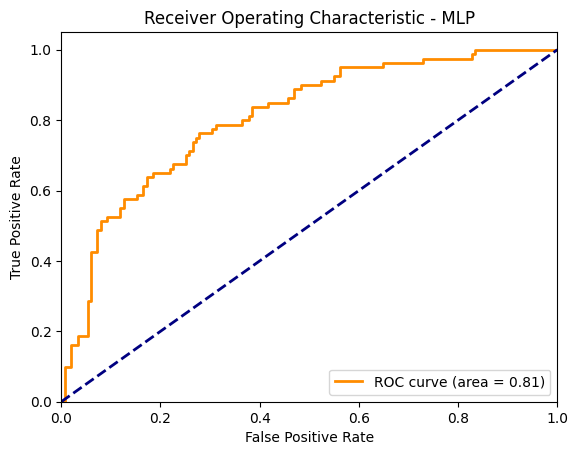

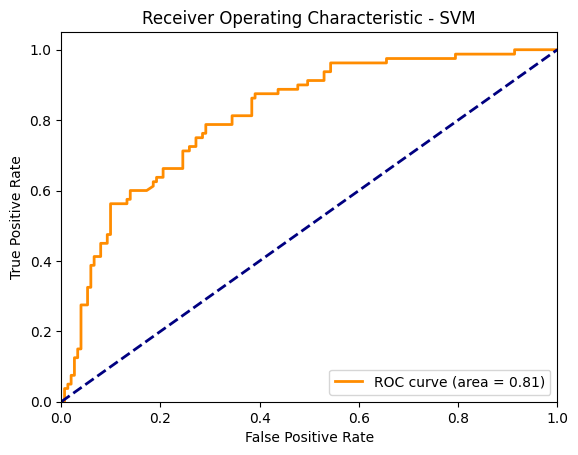

({'Model': 'MLP',
  'Confusion Matrix': array([[125,  26],
         [ 30,  50]], dtype=int64),
  'Accuracy': 0.7575757575757576,
  'Sensitivity': 0.625,
  'Specificity': 0.8278145695364238,
  'F1 Score': 0.6410256410256411,
  'ROC AUC': 0.8079470198675497},
 {'Model': 'SVM',
  'Confusion Matrix': array([[126,  25],
         [ 32,  48]], dtype=int64),
  'Accuracy': 0.7532467532467533,
  'Sensitivity': 0.6,
  'Specificity': 0.8344370860927153,
  'F1 Score': 0.6274509803921569,
  'ROC AUC': 0.8129139072847682})

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Veri setini train test olarak ayırma
X_train, X_test, y_train, y_test = trainTest(data)

# MLP modeli oluşturma ve eğitme
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

# SVM modeli oluşturma ve eğitme
svm_model = SVC(probability=True, kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# MLP tahminleri
y_pred_mlp = mlp_model.predict(X_test)
y_pred_proba_mlp = mlp_model.predict_proba(X_test)[:, 1]

# SVM tahminleri
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Sonuçları raporlama fonksiyonu
def report_results(y_test, y_pred, y_pred_proba, model_name):
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = class_report['accuracy']
    sensitivity = class_report['1']['recall']
    specificity = class_report['0']['recall']
    f1_score = class_report['1']['f1-score']
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    return {
        "Model": model_name,
        "Confusion Matrix": conf_matrix,
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "F1 Score": f1_score,
        "ROC AUC": roc_auc
    }

# MLP sonuçları
mlp_results = report_results(y_test, y_pred_mlp, y_pred_proba_mlp, "MLP")

# SVM sonuçları
svm_results = report_results(y_test, y_pred_svm, y_pred_proba_svm, "SVM")

mlp_results, svm_results


Elde ettiğimiz çıktının yorumlanması : 

### **Multi-Layer Perceptron (MLP)**

* **Accuracy= %75.76:** Modelin genel doğruluk oranı.
* **Sensitivity= %62.5:** Pozitif sınıfların doğru tahmin edilme oranı.
* **Specificity= %82.78:** Negatif sınıfların doğru tahmin edilme oranı.
* **F1 Score= %64.10:** Pozitif sınıfların doğruluğu ve duyarlılığı arasında dengeli bir metrik.
* **ROC AUC= 0.81:** Modelin genel performansını gösteren ROC eğrisi altında kalan alan.

### **Support Vector Machines (SVM)**

* **Accuracy= %75.32:** Modelin genel doğruluk oranı.
* **Sensitivity= %60:** Pozitif sınıfların doğru tahmin edilme oranı.
* **Specificity= %83.44:** Negatif sınıfların doğru tahmin edilme oranı.
* **F1 Score= %62.75:** Pozitif sınıfların doğruluğu ve duyarlılığı arasında dengeli bir metrik.
* **ROC AUC= 0.81:** Modelin genel performansını gösteren ROC eğrisi altında kalan alan.

### **Genel Değerlendirme**

Her iki model de benzer performans metriklerine sahip, ancak MLP duyarlılık ve F1 skoru açısından biraz daha iyi performans gösterirken, SVM özgüllük açısından biraz daha iyi performans göstermektedir. Hangi modelin seçileceği, pozitif veya negatif sınıfların daha kritik olup olmadığına bağlıdır. Eğer pozitif sınıfların (diyabet vakaları) doğru tahmin edilmesi daha kritikse, MLP tercih edilebilir. Eğer negatif sınıfların (diyabet olmayan vakalar) doğru tahmin edilmesi daha kritikse, SVM tercih edilebilir.